In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
sc.settings.set_figure_params(dpi=100, facecolor='white')

In [3]:
adata = sc.read("../../../data/schiller_whl_qc.h5ad")
adata

AnnData object with n_obs × n_vars = 24071 × 23400
    obs: 'Unnamed: 0', 'nGene', 'nUMI', 'orig.ident', 'identifier', 'res.2', 'grouping', 'cell.type', 'metacelltype', 'spline_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'is_doublet'
    var: 'gene_name', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'grouping_colors', 'hvg', 'neighbors', 'orig.ident_colors', 'pca', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p_norm', 'raw_counts'
    obsp: 'connectivities', 'd

### Clustering

UMAP has already been created so we can start with leiden clustering, testing different resolutions:

In [5]:
sc.tl.leiden(adata, key_added="leiden_0.7", resolution=0.7)
sc.tl.leiden(adata)
sc.tl.leiden(adata, key_added="leiden_1.3", resolution=1.3)

/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


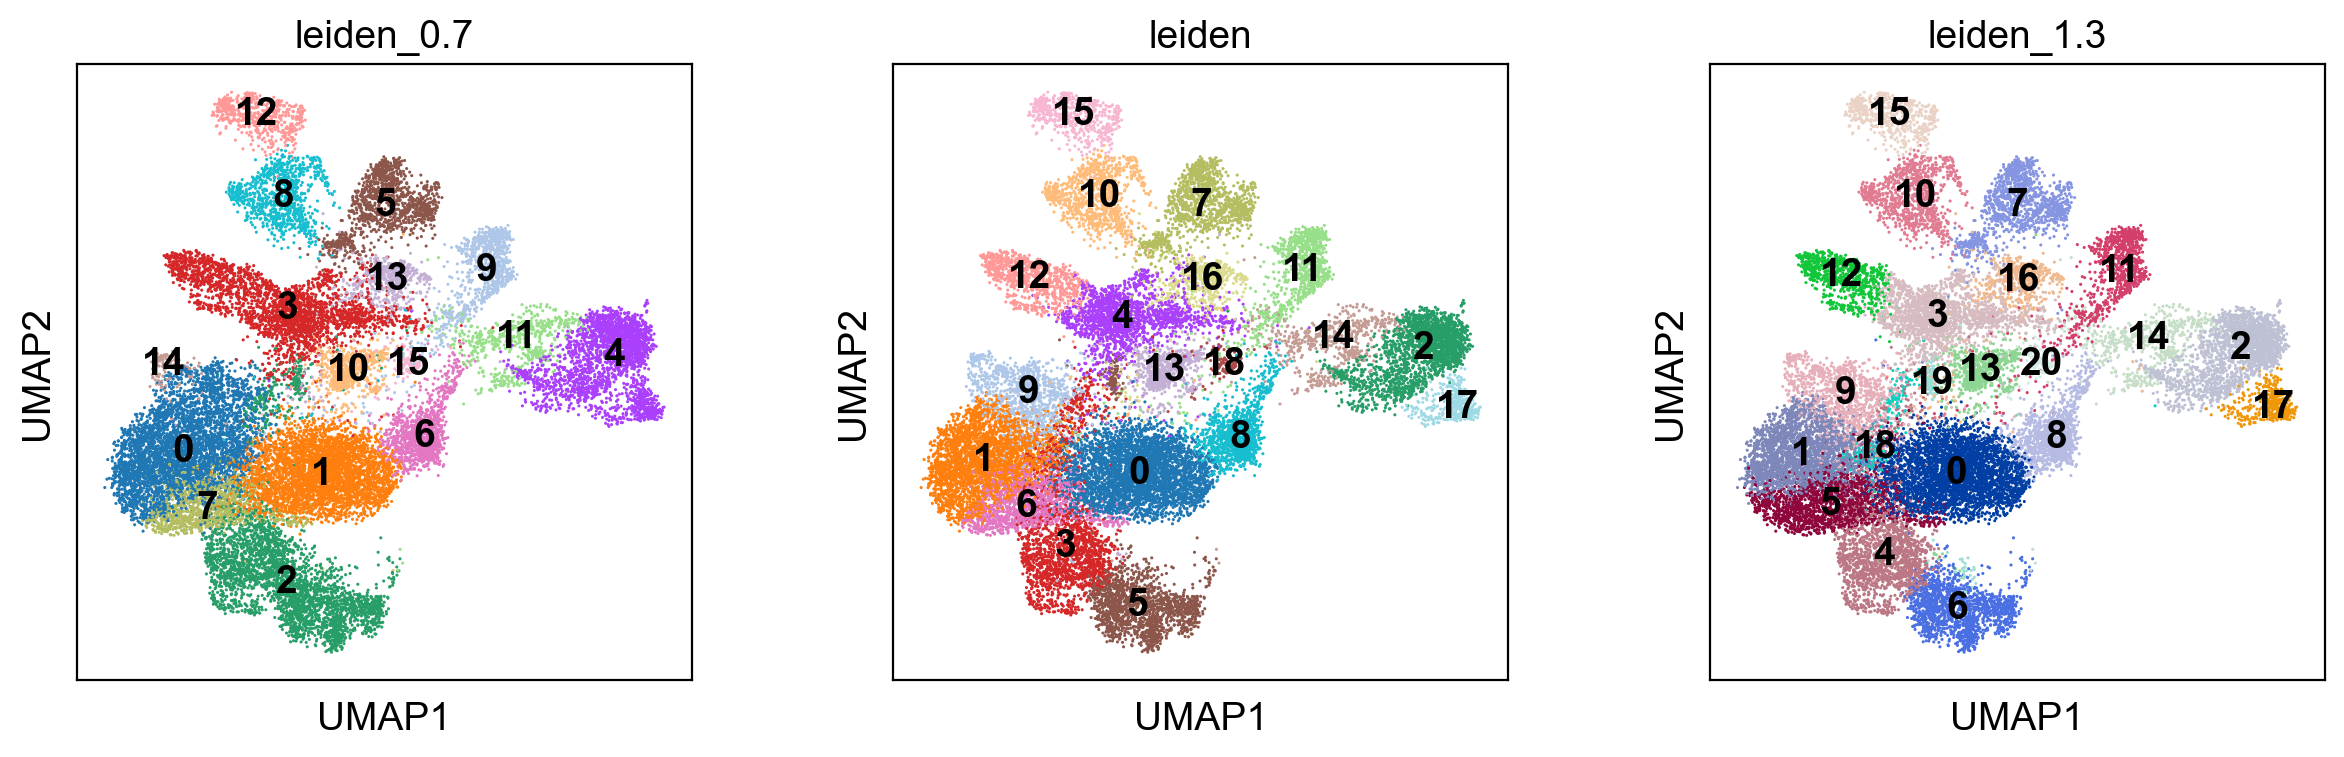

In [6]:
sc.pl.umap(
    adata,
    color=["leiden_0.7", "leiden", "leiden_1.3"],
    legend_loc="on data",
)

### Formatting for consistency

In [7]:
adata.obs

Unnamed: 0  nGene  nUMI orig.ident  \
0      muc4169_PBS_d14:muc4169_PBS_d14:CCATCCCGCCCG    288   366    muc4169   
1      muc4169_PBS_d14:muc4169_PBS_d14:ATCACCTATGCG    784  1429    muc4169   
2      muc4169_PBS_d14:muc4169_PBS_d14:CGCACCGACCAC    333   437    muc4169   
3      muc4169_PBS_d14:muc4169_PBS_d14:TCCTACTGGCAC    255   421    muc4169   
4      muc4169_PBS_d14:muc4169_PBS_d14:CCGGAAACGCGA    389   516    muc4169   
...                                             ...    ...   ...        ...   
29291  muc4657_PBS_d21:muc4657_PBS_d21:CGGGTCTCATCT    698   976    muc4657   
29292  muc4657_PBS_d21:muc4657_PBS_d21:ATCAAGACAGTG    340   670    muc4657   
29293  muc4657_PBS_d21:muc4657_PBS_d21:GACTGCGCATGG    223   263    muc4657   
29294  muc4657_PBS_d21:muc4657_PBS_d21:ATGACCGAATGT    240   436    muc4657   
29295  muc4657_PBS_d21:muc4657_PBS_d21:GTGTTTGGACCG    668  1081    muc4657   

            identifier  res.2 grouping       cell.type       metacelltype  \
0      muc4169_PBS_d14      5      PBS   T-lymphocytes            T_cells   
1      muc4169_PBS_d14      1      PBS       AT2 cells     alv_epithelium   
2      muc4169_PBS_d14     13      PBS            VECs  endothelial_cells   
3      muc4169_PBS_d14      1      PBS       AT2 cells     alv_epithelium   
4      muc4169_PBS_d14      5      PBS   T-lymphocytes            T_cells   
...                ...    ...      ...             ...                ...   
29291  muc4657_PBS_d21     11      PBS  Ciliated cells     ciliated_cells   
29292  muc4657_PBS_d21      1      PBS       AT2 cells     alv_epithelium   
29293  muc4657_PBS_d21     11      PBS  Ciliated cells     ciliated_cells   
29294  muc4657_PBS_d21      1      PBS       AT2 cells     alv_epithelium   
29295  muc4657_PBS_d21      5      PBS   T-lymphocytes            T_cells   

       spline_cluster  ...  log1p_total_counts_hb  pct_counts_hb  outlier  \
0             t_cells  ...                    0.0            0.0    False   
1      alv_epithelium  ...                    0.0            0.0    False   
2                 vec  ...                    0.0            0.0    False   
3      alv_epithelium  ...                    0.0            0.0    False   
4             t_cells  ...                    0.0            0.0    False   
...               ...  ...                    ...            ...      ...   
29291  ciliated_cells  ...                    0.0            0.0    False   
29292  alv_epithelium  ...                    0.0            0.0    False   
29293  ciliated_cells  ...                    0.0            0.0    False   
29294  alv_epithelium  ...                    0.0            0.0    False   
29295         t_cells  ...                    0.0            0.0    False   

       mt_outlier  doublet_score  predicted_doublet  is_doublet  leiden_0.7  \
0           False       0.131287              False       False           3   
1           False       0.040942              False       False           4   
2           False       0.040942              False       False           5   
3           False       0.038234              False       False          11   
4           False       0.022087              False       False           3   
...           ...            ...                ...         ...         ...   
29291       False       0.023217              False       False           9   
29292       False       0.017725              False       False           4   
29293       False       0.015406              False       False           9   
29294       False       0.037590              False       False           4   
29295       False       0.062247              False       False           3   

       leiden  leiden_1.3  
0           4           3  
1           2           2  
2           7           7  
3          14          14  
4           4           3  
...       ...         ...  
29291      11          11  
29292      17          17  
29293      11          11  
29294      17

/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


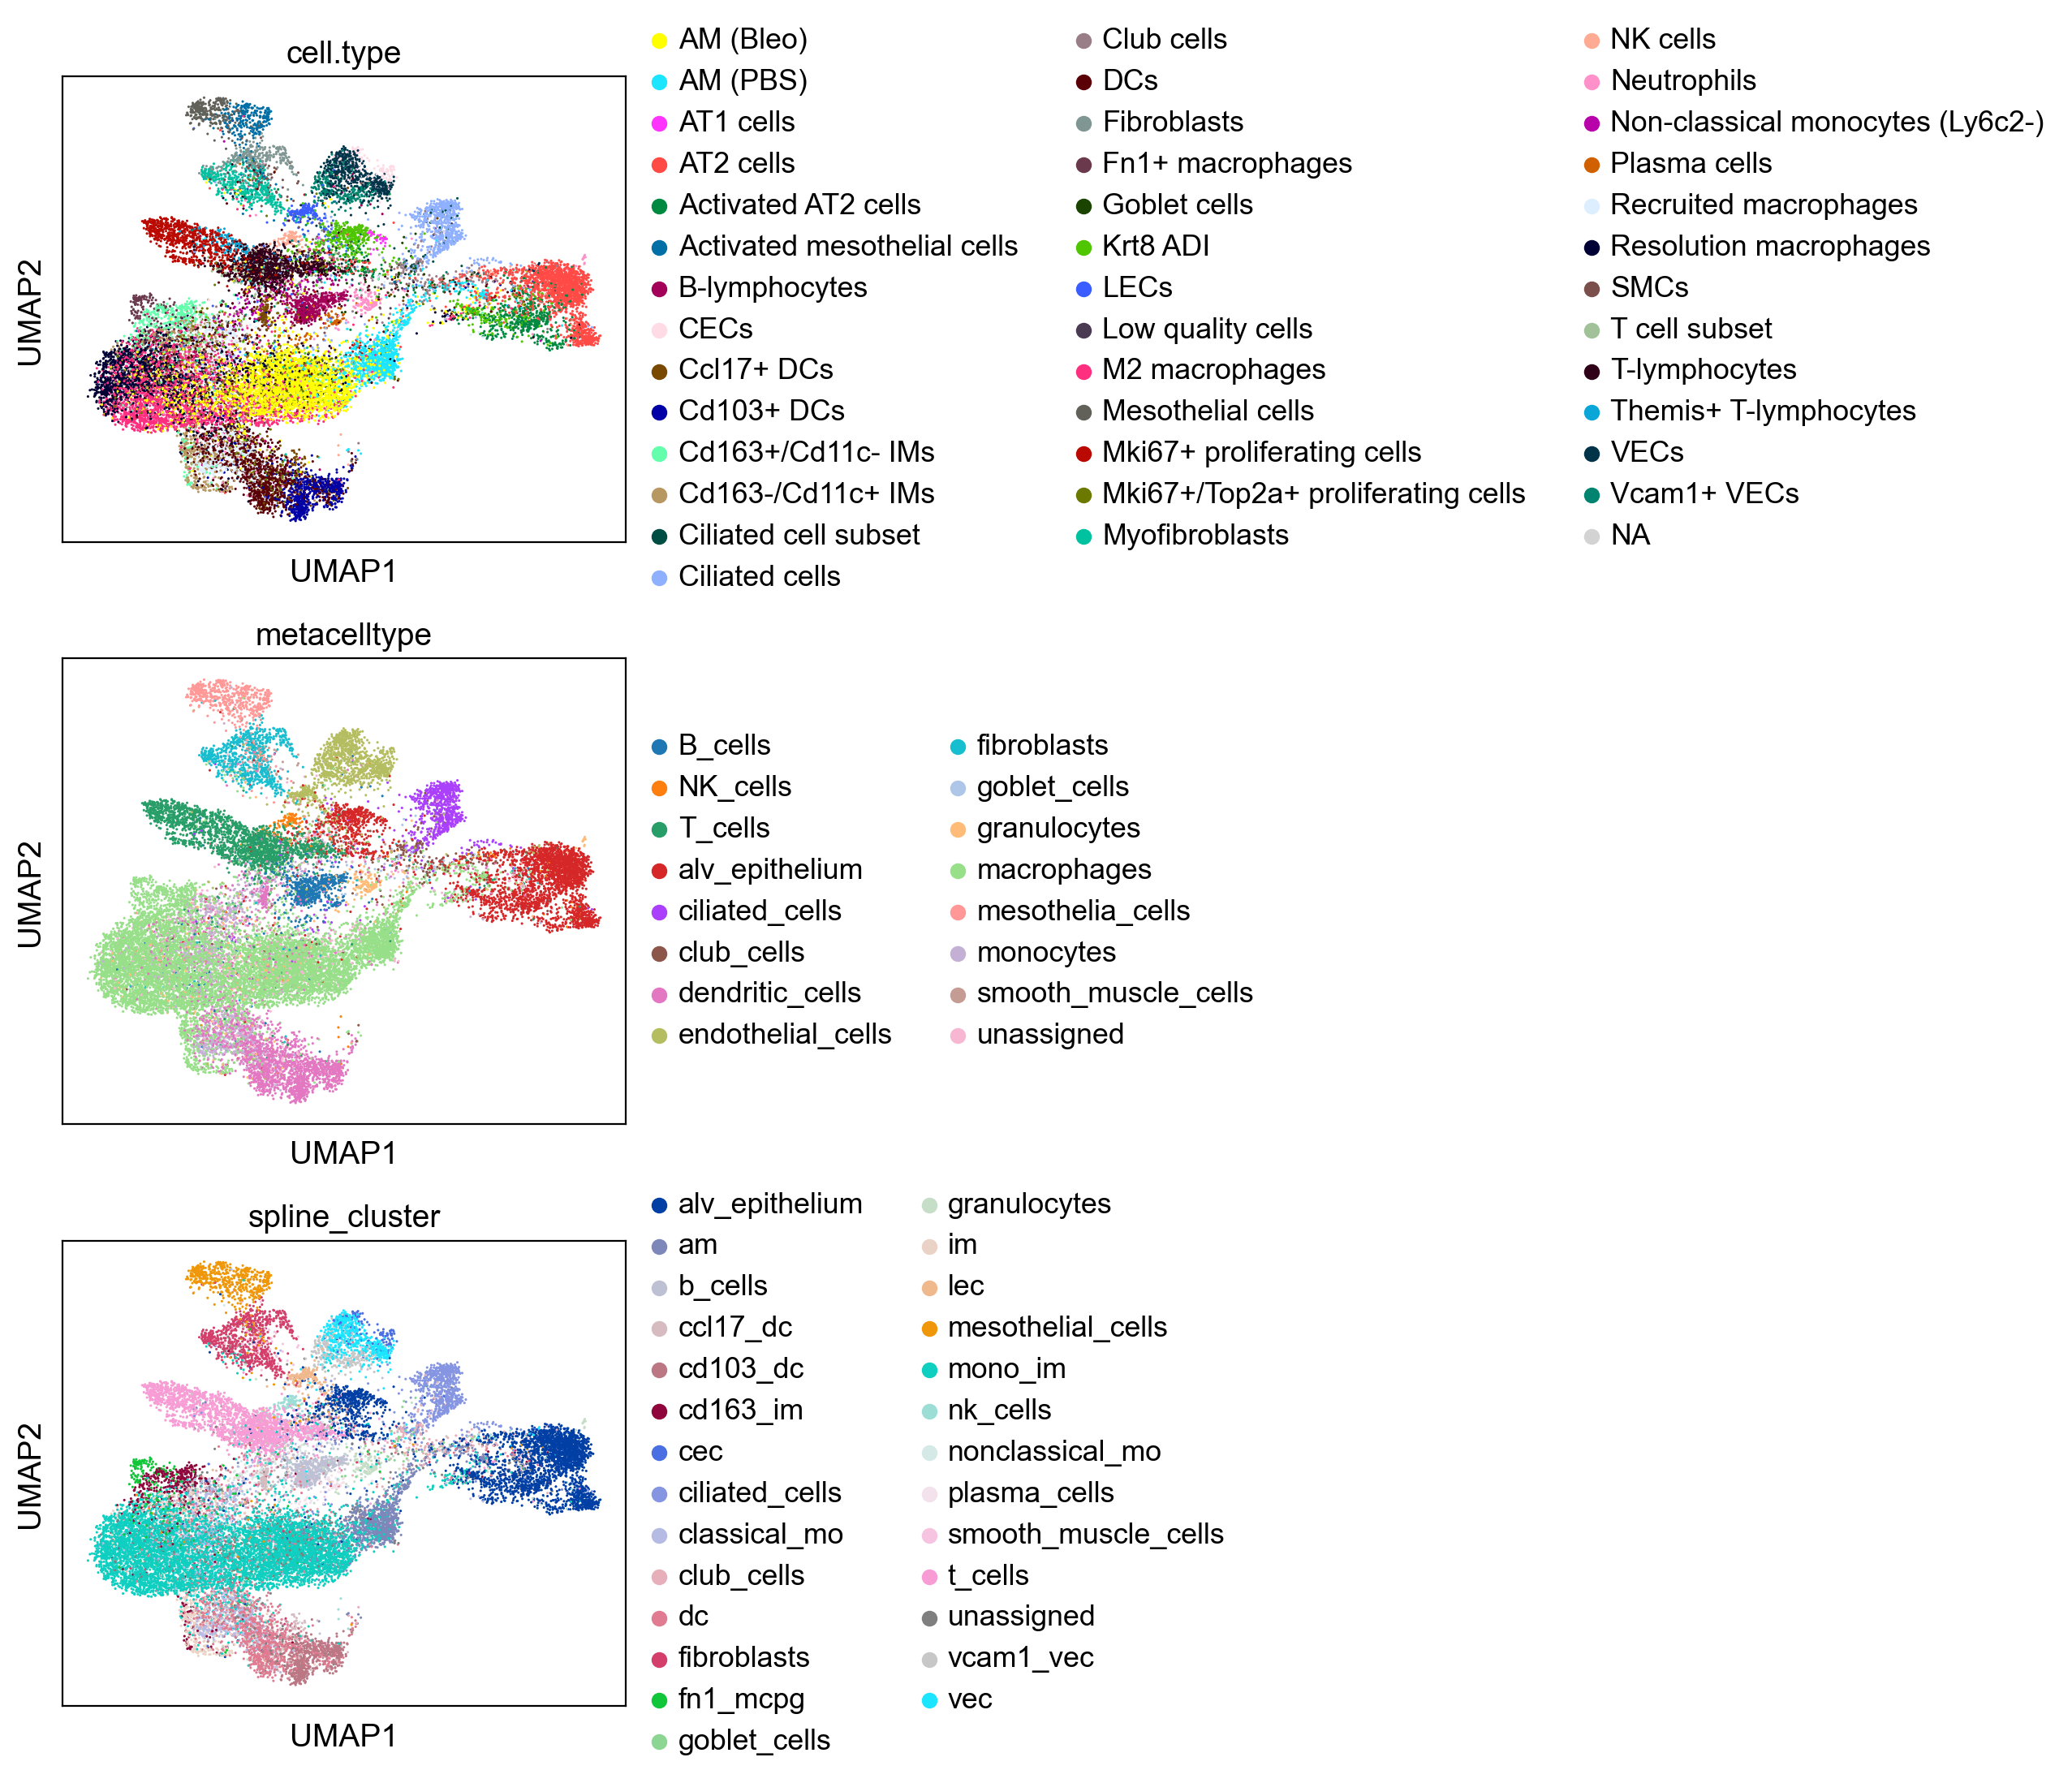

In [9]:
sc.pl.umap(adata, color=["cell.type", "metacelltype", "spline_cluster"], ncols=1)

creating obs categories with meaningful names and format to use later:

In [35]:
adata.obs["author_annotation"] = adata.obs["cell.type"]
adata.obs["author_annotation_coarse"] = adata.obs["metacelltype"]

adata.obs["batch"] = adata.obs["orig.ident"]

adata.obs["condition"] = adata.obs["grouping"]
adata.obs["condition"].replace({'PBS':"healthy", 'd3':"bleo", 'd7':"bleo", 'd10':"bleo", 'd14':"bleo", 'd21':"bleo", 'd28':"bleo"}, inplace=True)

adata.obs["timepoint"] = adata.obs["identifier"].str.rsplit("_", n=1)
adata.obs["timepoint"] = adata.obs["timepoint"].str[-1]

### Annotation

Define the decided marker genes:

In [20]:
f = open('marker_genes.json')
marker_genes = json.load(f)
f.close()

Subset to only detected markers: (as in best practices)

In [21]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

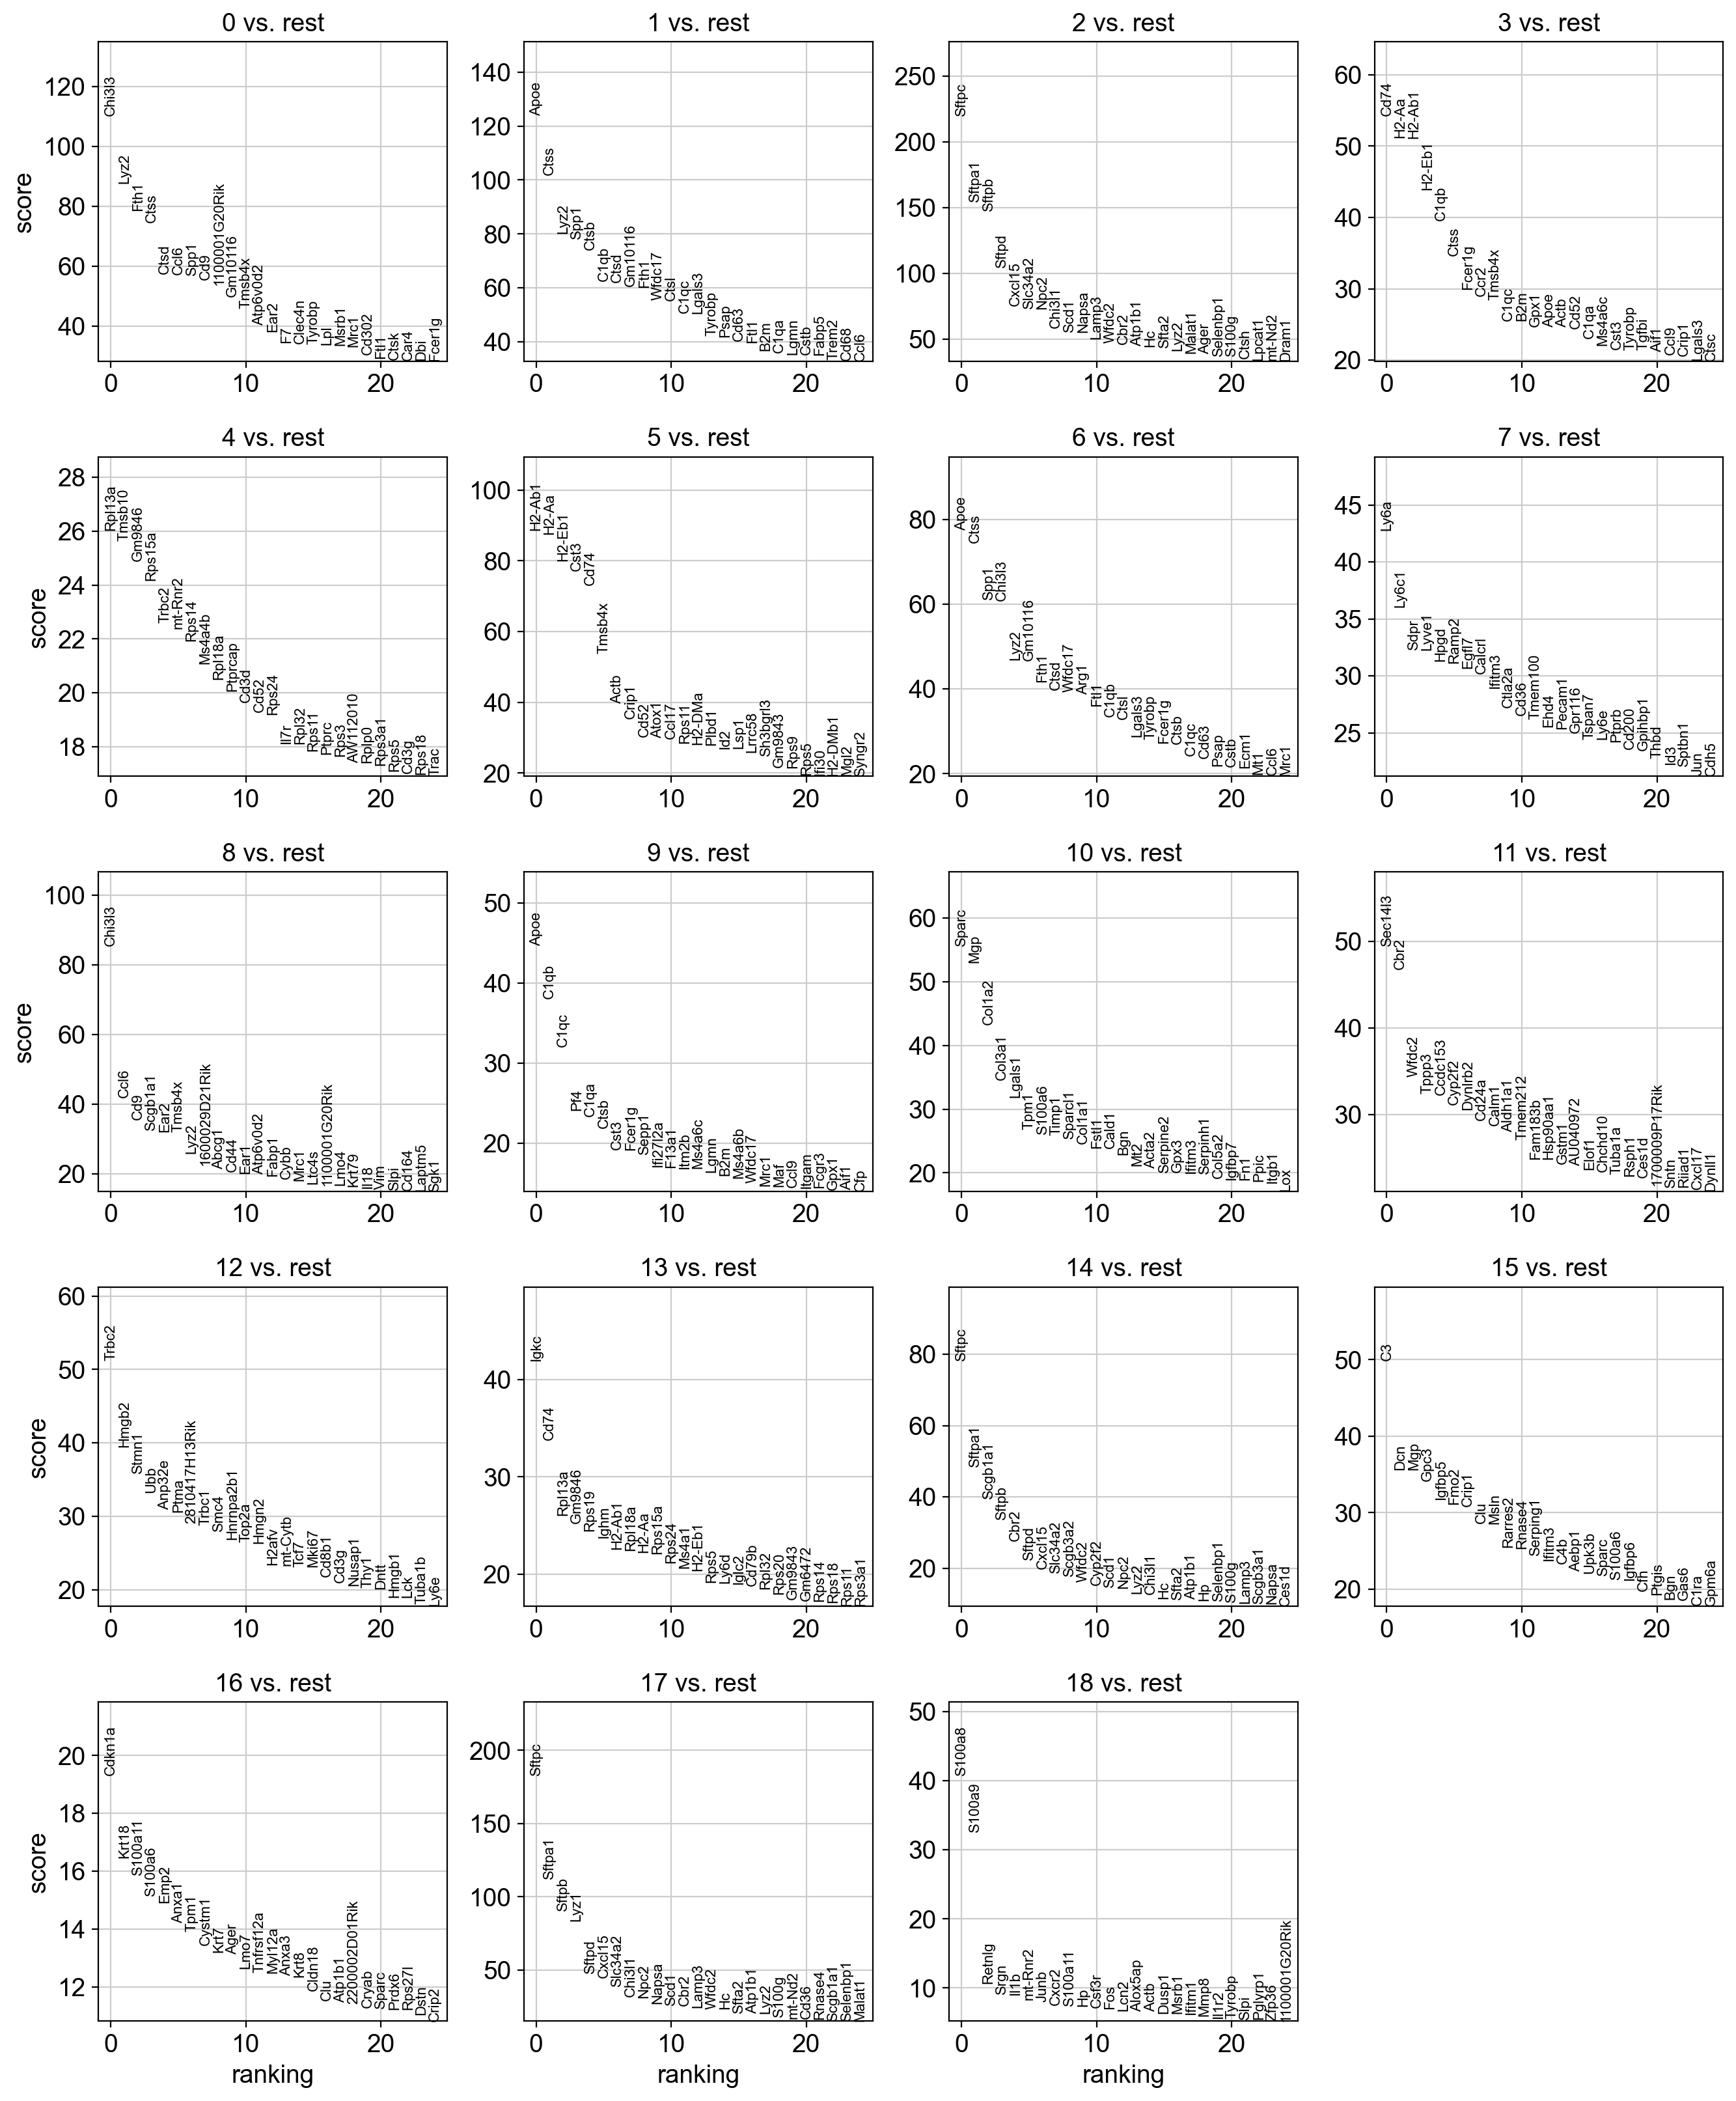

In [22]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


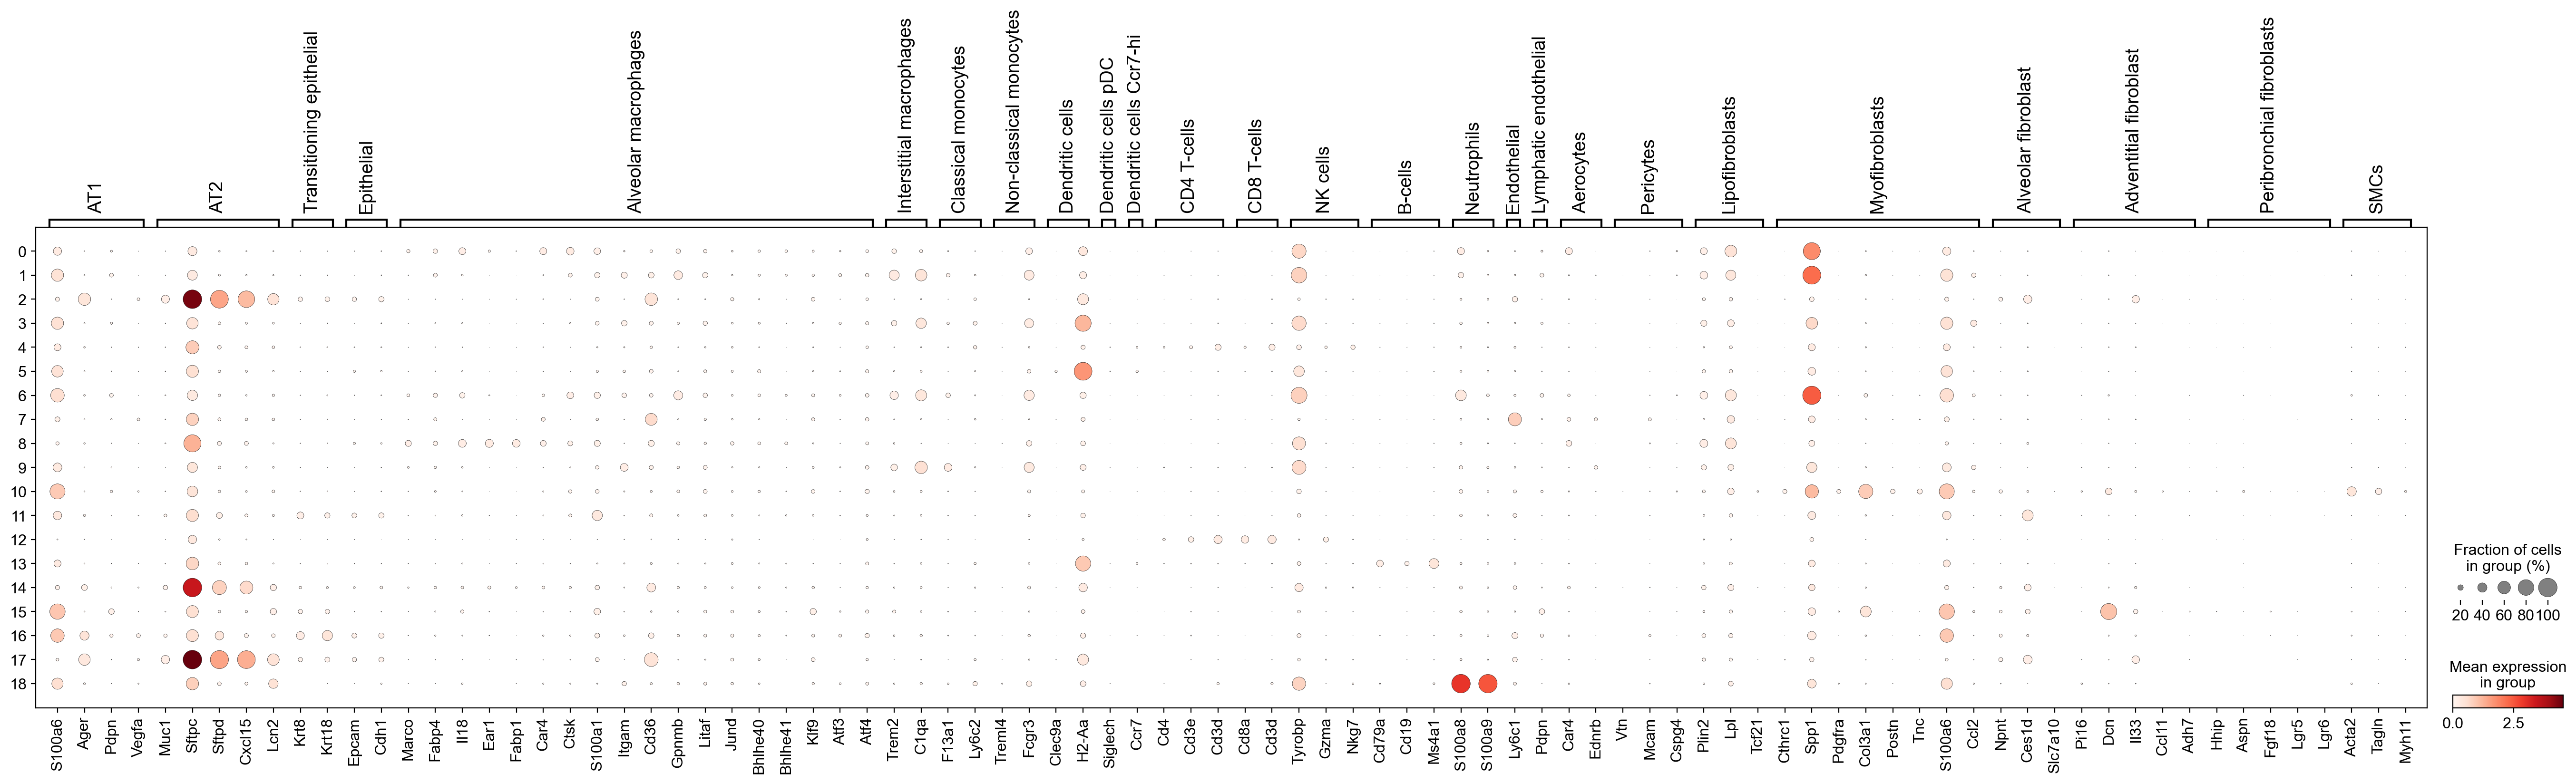

In [26]:
sc.pl.dotplot(adata, marker_genes_in_data, groupby=['leiden'])

/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


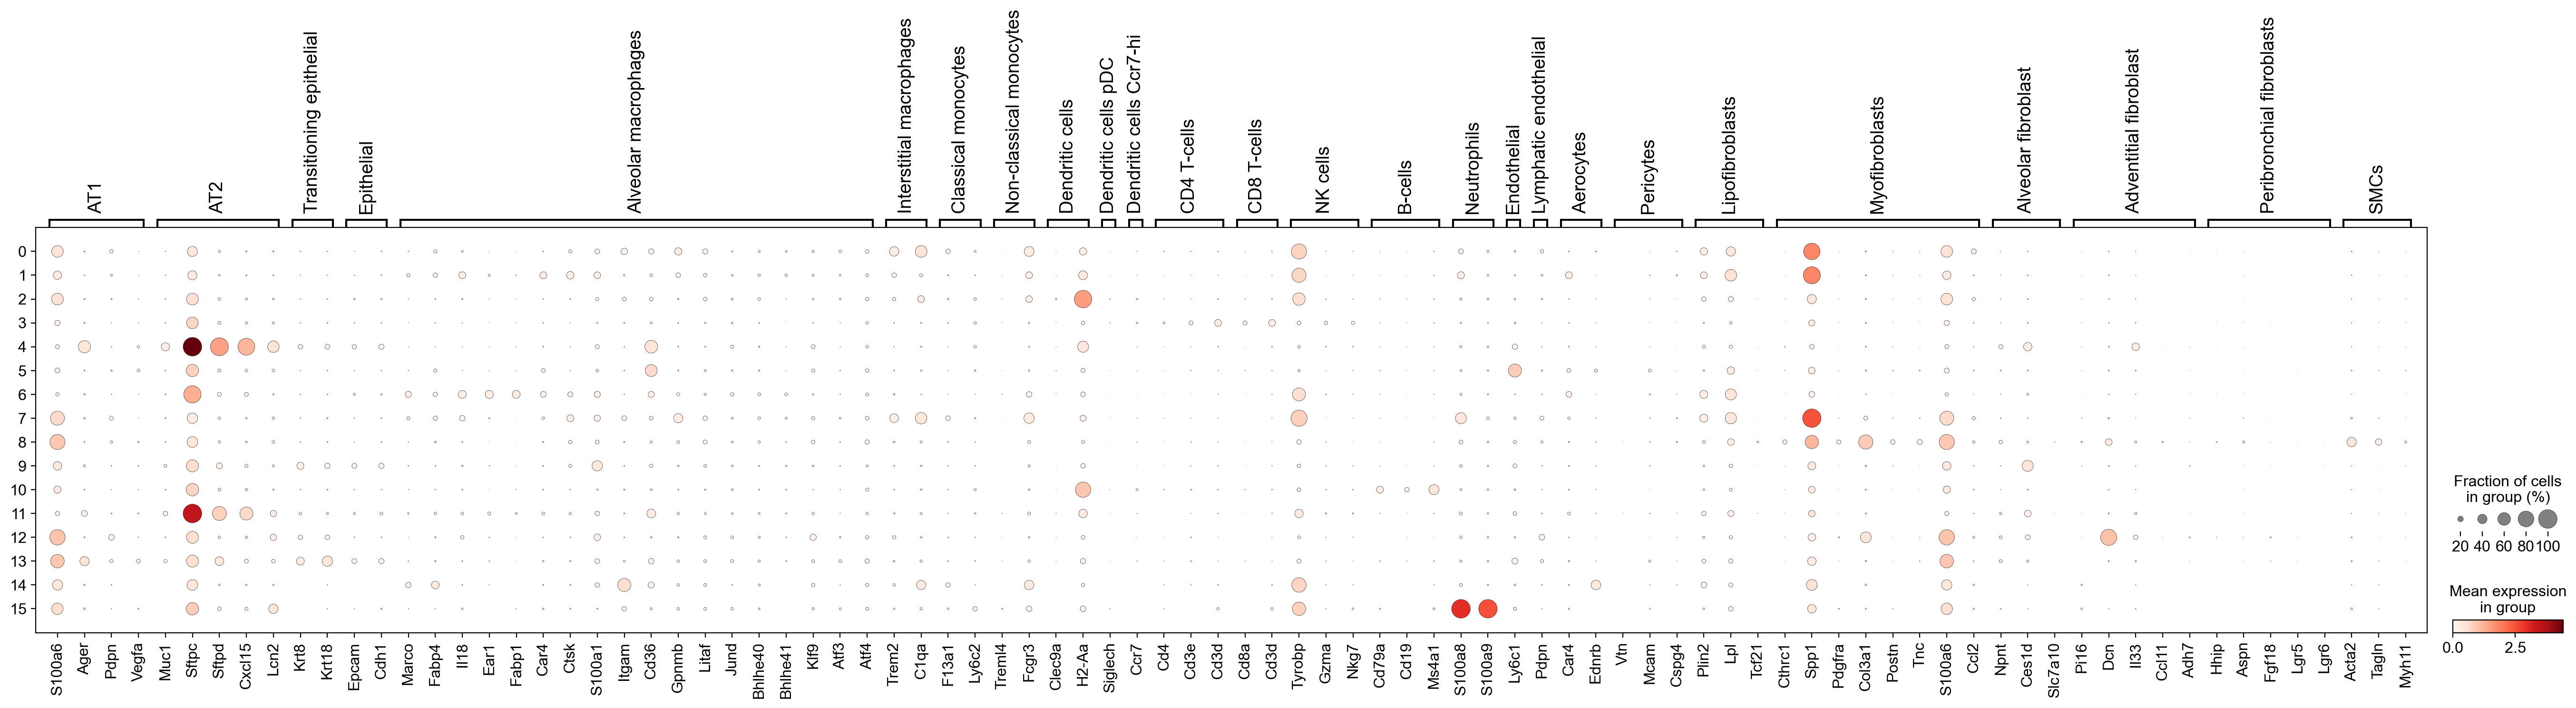

In [27]:
sc.pl.dotplot(adata, marker_genes_in_data, groupby=['leiden_0.7'])

Looks like leiden resolution 0.7 is enough for our coarseness of annotation, let's check if even lower resolution is better:

-------------

/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


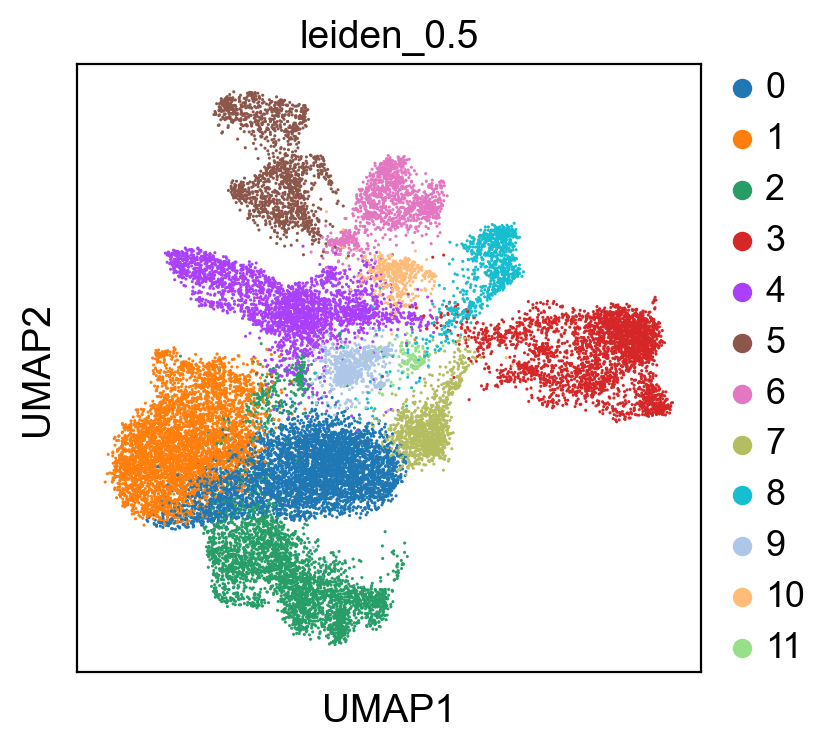

In [28]:
sc.tl.leiden(adata, key_added="leiden_0.5", resolution=0.5)
sc.pl.umap(adata, color="leiden_0.5")

/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


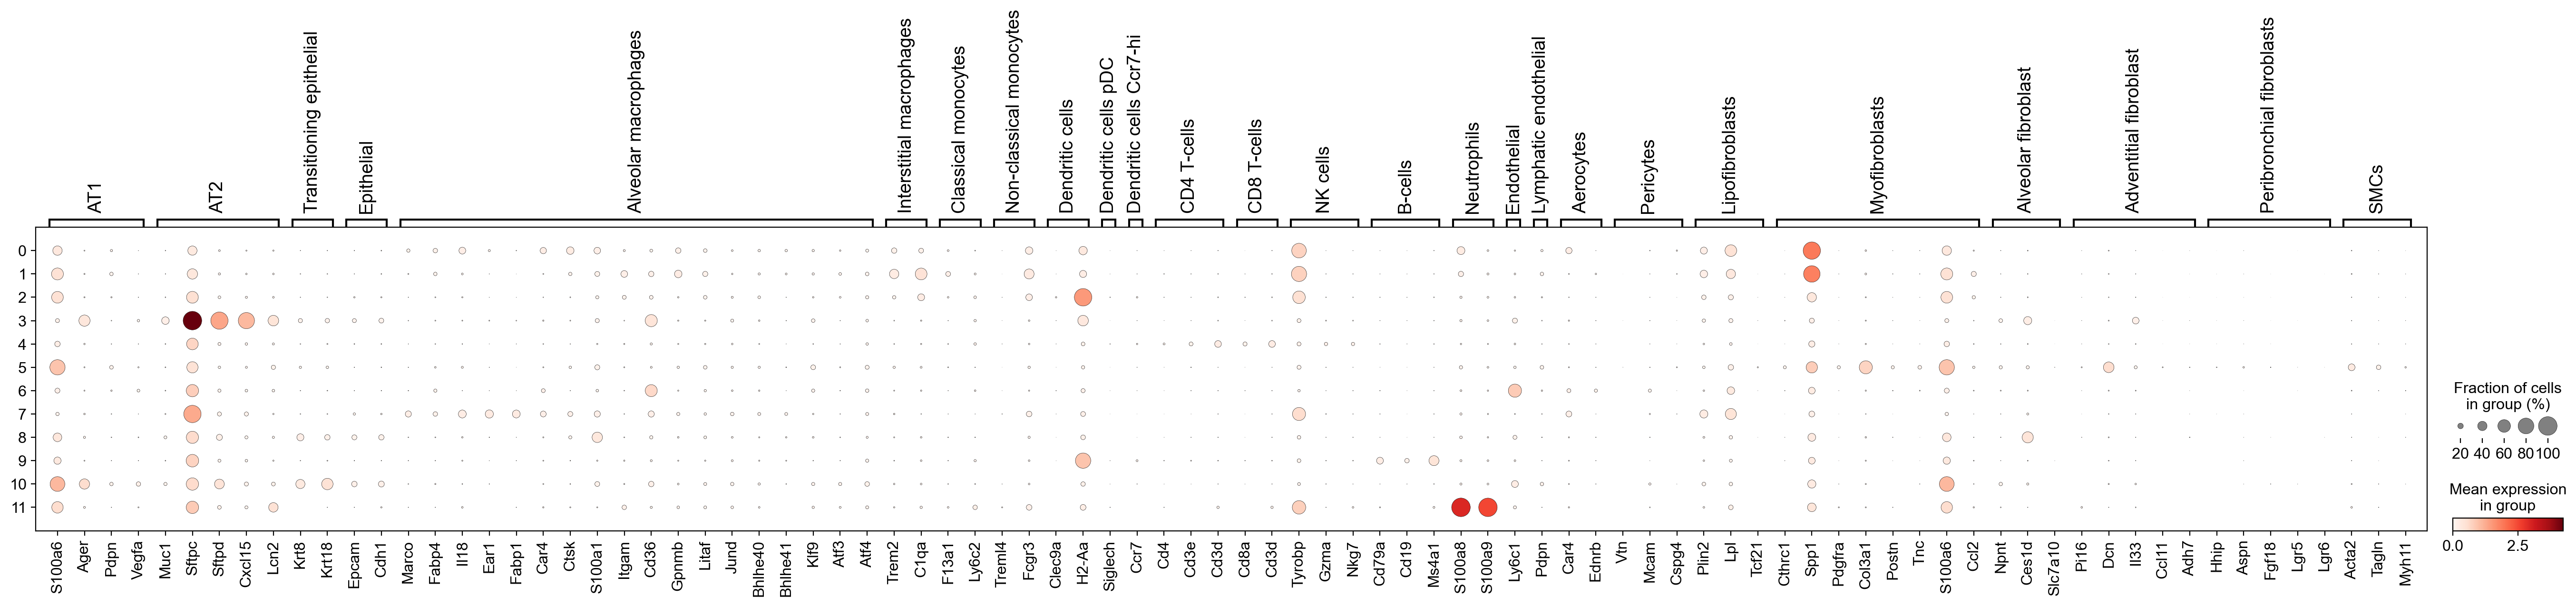

In [29]:
sc.pl.dotplot(adata, marker_genes_in_data, groupby=['leiden_0.5'])

there are less undefined clusters, so I will annotate according to leiden 0.5 clustering

--------------------------------

In [30]:
manual_annotation_05 = {
    "0": "Myofibroblasts",
    "1": "Myofibroblasts",
    "2": "Dendritic",
    "3": "AT2",
    "4": "undefined",
    "5": "AT1",
    "6": "Endothelial",
    "7": "AT2",
    "8": "Alveolar fibroblast", #?
    "9": "Dendritic",
    "10": "AT1",
    "11": "Neutrophils"
}

In [32]:
adata.obs["manual_celltype_annotation"] = adata.obs["leiden_0.5"].map(manual_annotation_05).astype("category")

/home/d/danilina/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


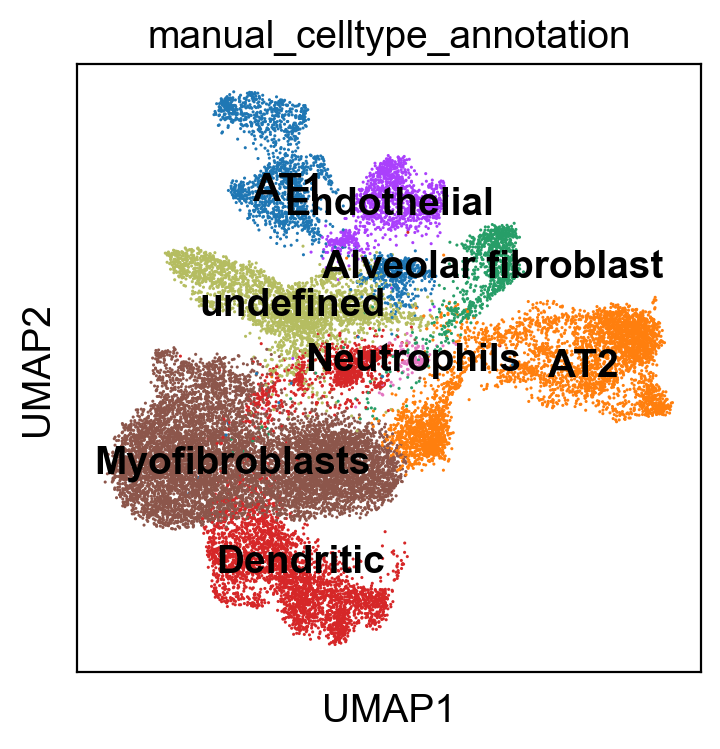

In [33]:
sc.pl.umap(adata, color="manual_celltype_annotation", legend_loc="on data")

In [36]:
adata

AnnData object with n_obs × n_vars = 24071 × 23400
    obs: 'Unnamed: 0', 'nGene', 'nUMI', 'orig.ident', 'identifier', 'res.2', 'grouping', 'cell.type', 'metacelltype', 'spline_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'is_doublet', 'leiden_0.7', 'leiden', 'leiden_1.3', 'author_annotation', 'batch', 'condition', 'timepoint', 'leiden_0.5', 'manual_celltype_annotation', 'author_annotation_coarse'
    var: 'gene_name', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'grouping_colors', 'hvg', 'neighb

In [37]:
adata.write("../../../data/schiller_whl_anno.h5ad")